# Predicting Automotive MPG
## Machine Learning Zoomcamp Midterm Project 1
## Nathan Neece


## Introduction:

Mile per gallon (MPG) is an important specification for consumers looking to purchase a vehicle, for producers designing new vehicles, and for environmentalists and government agencies looking to regulate emmisions. Predicting MPG based on a vehicle's specifications can provide automotive manufacturer's with information to make data-driven decisions to optimize vehicle/engine design. Predicting MPG can also help guide consumers when purchasing vehicles that do not yet have posted MPG values or with swapped out engines.

The primary goal of this project is to create a model that can predict MPG of vehicles based on various features. These features include the following:



*   **Cylinders**: The number of cylinders the engine has.
*   **Displacement**: The displacement of the engine in cubic inches.
*   **Horsepower**: The power generation of the engine.
*   **Weight**: The overall weight of the vehicle.
*   **Acceleration**: The 0-60 mph time.
*   **Model Year**: The manufacturing year of the vehicle.
*   **Origin**: The region where the vehicle was manufactured. (e.g., USA, Europe, Japan).

The target variable for the model would be MPG.



In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/autompg-dataset")

print("Path to dataset files:", path)

100%|██████████| 6.31k/6.31k [00:00<00:00, 12.2MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/uciml/autompg-dataset/versions/3


In [3]:
df = pd.read_csv(path + "/auto-mpg.csv")
df.head().T

,0,1,2,3,4
mpg,18.0,15.0,18.0,16.0,17.0
cylinders,8,8,8,8,8
displacement,307.0,350.0,318.0,304.0,302.0
horsepower,130,165,150,150,140
weight,3504,3693,3436,3433,3449
acceleration,12.0,11.5,11.0,12.0,10.5
model year,70,70,70,70,70
origin,1,1,1,1,1
car name,chevrolet chevelle malibu,buick skylark 320,plymouth satellite,amc rebel sst,ford torino


In [4]:
#Check the data for missing values and replace if needed

print(df.isnull().sum())
df = df.dropna()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


In [5]:
#Clean up the column headers:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [6]:
#Clean up the data values that are strings:
string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')
df.head().T

,0,1,2,3,4
mpg,18.0,15.0,18.0,16.0,17.0
cylinders,8,8,8,8,8
displacement,307.0,350.0,318.0,304.0,302.0
horsepower,130,165,150,150,140
weight,3504,3693,3436,3433,3449
acceleration,12.0,11.5,11.0,12.0,10.5
model_year,70,70,70,70,70
origin,1,1,1,1,1
car_name,chevrolet_chevelle_malibu,buick_skylark_320,plymouth_satellite,amc_rebel_sst,ford_torino


In [7]:
#Convert horepower to numeric
df["horsepower"] = pd.to_numeric(df["horsepower"], errors="coerce")
df = df.dropna(subset=["horsepower"])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car_name      392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


Identify how many unique car models are in the data set.

In [9]:
num_models = df.car_name.nunique()
print(f"There are {num_models} unique car models in the dataset.")
cylinders = np.sort(df.cylinders.unique())
print(f"The unique number of cylinders in the dataset are {cylinders}.")
dis_range = (df.displacement.min(), df.displacement.max())
print(f"The range of displacement in the dataset is {dis_range} cubic inches.")

There are 301 unique car models in the dataset.
The unique number of cylinders in the dataset are [3 4 5 6 8].
The range of displacement in the dataset is (68.0, 455.0) cubic inches.


In [10]:
#Get descriptive statistics for numerical data
df.select_dtypes(include=['float64']).head().describe()

,mpg,displacement,horsepower,acceleration
count,5.00000,5.000000,5.000000,5.00000
mean,16.80000,316.200000,147.000000,11.40000
std,1.30384,19.879638,13.038405,0.65192
min,15.00000,302.000000,130.000000,10.50000
25%,16.00000,304.000000,140.000000,11.00000
50%,17.00000,307.000000,150.000000,11.50000
75%,18.00000,318.000000,150.000000,12.00000
max,18.00000,350.000000,165.000000,12.00000


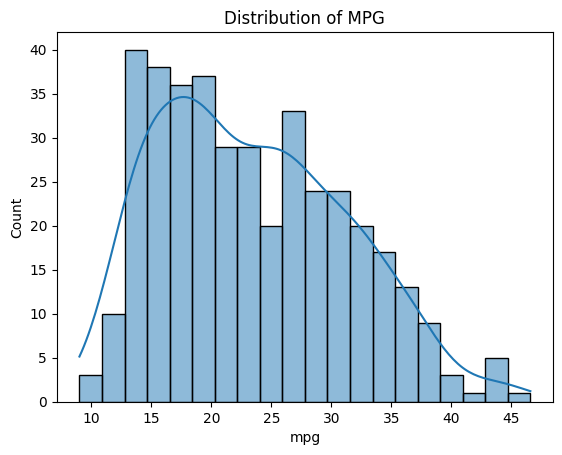

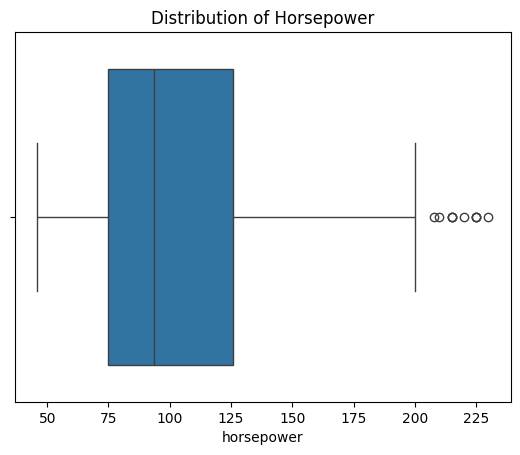

In [11]:
#Create histograms for continuous data columns
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['mpg'], kde=True, bins=20)
plt.title("Distribution of MPG")
plt.show()

#Create a separate image for the boxplot of the horsepower
sns.boxplot(x=df['horsepower'])
plt.title("Distribution of Horsepower")
plt.show()


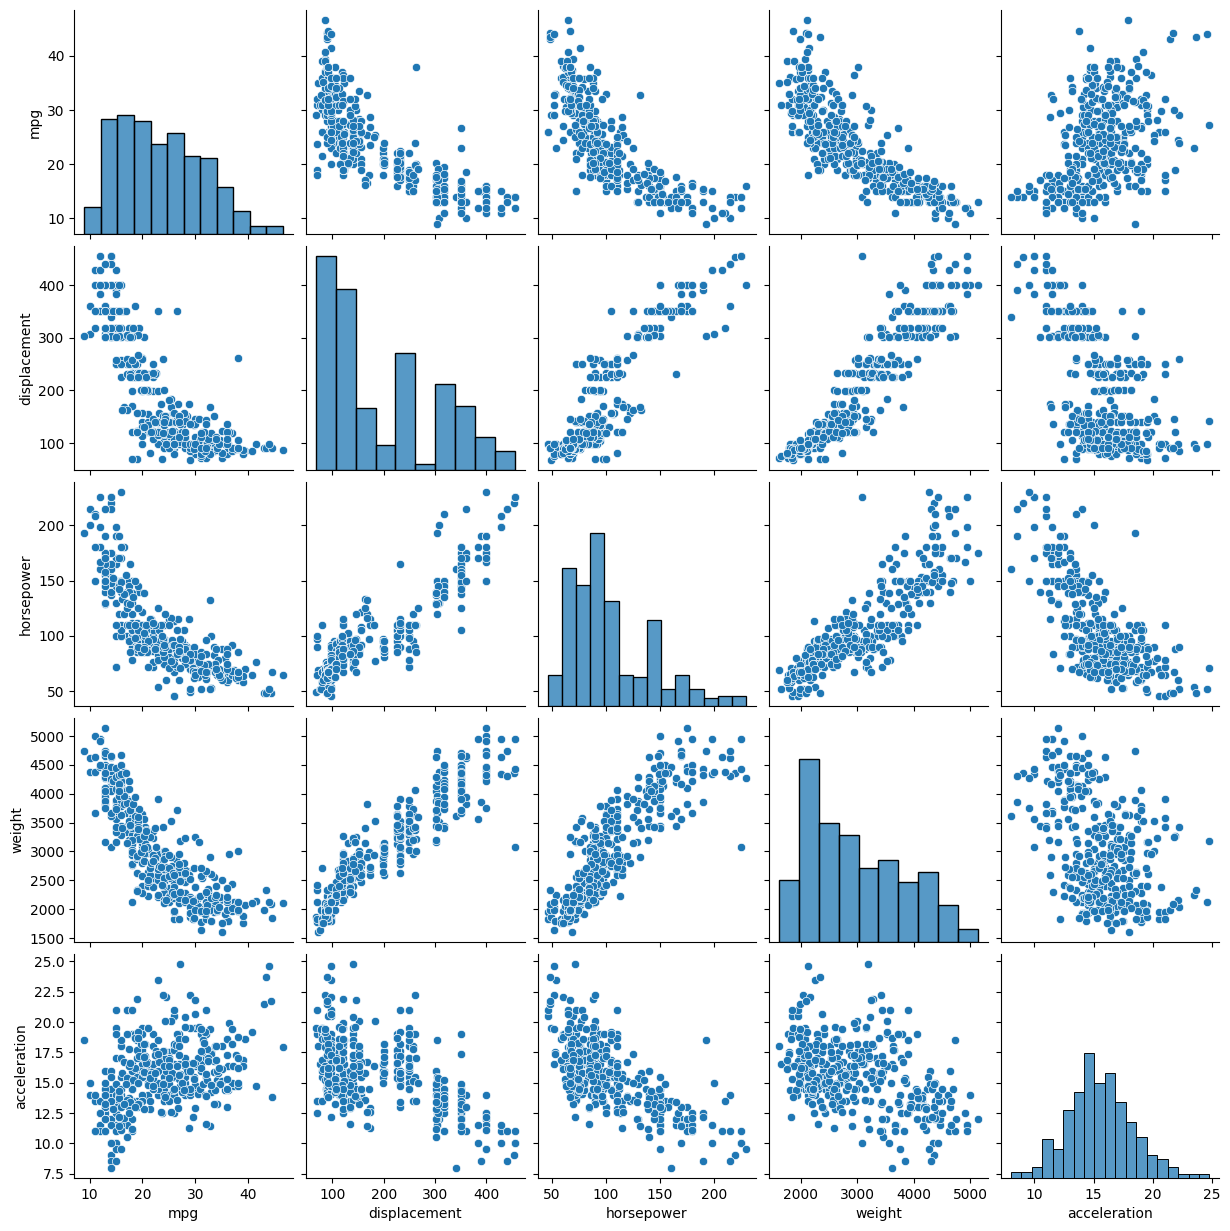

In [12]:
#Create a pairplot to see relationships between variables
sns.pairplot(df, vars=["mpg", "displacement", "horsepower", "weight", "acceleration"])
plt.show()

## Feature Engineering

In [13]:
#Use one-hot encoding to transform origin column into two binary columns to get rid of ordinality
df = pd.get_dummies(df, columns=["origin"], drop_first=True)
#Change the trues and falses in the origin columns to 1's and 0's
df.origin_2 = df.origin_2.astype(int)
df.origin_3 = df.origin_3.astype(int)
df.head().T


,0,1,2,3,4
mpg,18.0,15.0,18.0,16.0,17.0
cylinders,8,8,8,8,8
displacement,307.0,350.0,318.0,304.0,302.0
horsepower,130.0,165.0,150.0,150.0,140.0
weight,3504,3693,3436,3433,3449
acceleration,12.0,11.5,11.0,12.0,10.5
model_year,70,70,70,70,70
car_name,chevrolet_chevelle_malibu,buick_skylark_320,plymouth_satellite,amc_rebel_sst,ford_torino
origin_2,0,0,0,0,0
origin_3,0,0,0,0,0


In [14]:
df.dtypes

,0
mpg,float64
cylinders,int64
displacement,float64
horsepower,float64
weight,int64
acceleration,float64
model_year,int64
car_name,object
origin_2,int64
origin_3,int64


# Training Models

Split data into training, validation, and testing groups.

In [16]:
from sklearn.model_selection import train_test_split

# Split the data into train, validation, and test sets
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

print(f"Training samples: {len(df_train)}, Validation samples: {len(df_val)}, Test samples: {len(df_test)}")

# Reset indices for consistency
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# Extract target variables
y_train = df_train.mpg.values
y_val = df_val.mpg.values
y_test = df_test.mpg.values

# Drop target variable from features
df_train = df_train.drop(columns=['mpg'])
df_val = df_val.drop(columns=['mpg'])
df_test = df_test.drop(columns=['mpg'])


Training samples: 234, Validation samples: 79, Test samples: 79


Process the split data and prepare it for the model.

In [17]:
from sklearn.preprocessing import StandardScaler

# List of numerical columns to standardize
num_cols = ['displacement', 'horsepower', 'weight', 'acceleration']

# Apply standard scaling
scaler = StandardScaler()
df_train[num_cols] = scaler.fit_transform(df_train[num_cols])
df_val[num_cols] = scaler.transform(df_val[num_cols])
df_test[num_cols] = scaler.transform(df_test[num_cols])

# One-hot encoding for categorical variables if necessary
df_train = pd.get_dummies(df_train, drop_first=True)
df_val = pd.get_dummies(df_val, drop_first=True)
df_test = pd.get_dummies(df_test, drop_first=True)

# Align columns in case of mismatched features
df_val = df_val.reindex(columns=df_train.columns, fill_value=0)
df_test = df_test.reindex(columns=df_train.columns, fill_value=0)


## Create the three different models to test.

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

reg = LinearRegression().fit(df_train, y_train)
y_pred_val_lr = reg.predict(df_val)
mse_lr = mean_squared_error(y_val, y_pred_val_lr)
r2_lr = r2_score(y_val, y_pred_val_lr)
# results[name] = {"MSE": mse, "R2": r2}
print("Linear Regression MSE:", mse_lr)
print("Linear Regression R2:", r2_lr)

rf = RandomForestRegressor(random_state=10).fit(df_train, y_train)
y_pred_val_rf = rf.predict(df_val)
mse_rf = mean_squared_error(y_val, y_pred_val_rf)
r2_rf = r2_score(y_val, y_pred_val_rf)
print("Random Forest MSE:", mse_rf)
print("Random Forest R2:", r2_rf)

svr = SVR().fit(df_train, y_train)
y_pred_val_svr = svr.predict(df_val)
mse_svr = mean_squared_error(y_val, y_pred_val_svr)
r2_svr = r2_score(y_val, y_pred_val_svr)
print("Support Vector Regression MSE:", mse_svr)
print("Support Vector Regression R2:", r2_svr)

Linear Regression MSE: 3.115497050989687e+21
Linear Regression R2: -5.107319357407507e+19
Random Forest MSE: 5.44207618987342
Random Forest R2: 0.9107865595308534
Support Vector Regression MSE: 52.70102184097089
Support Vector Regression R2: 0.13605776350183607


## Tune the Random Forest model to find the best parameters

In [19]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10]
}

grid_search = GridSearchCV(
    RandomForestRegressor(random_state=10),
    param_grid,
    cv=3,
    scoring="neg_mean_squared_error"
)

grid_search.fit(df_train, y_train)

print("Best Parameters:", grid_search.best_params_)

# Train with best parameters
best_rf = grid_search.best_estimator_
y_pred_val_rf = best_rf.predict(df_val)

print("Tuned Random Forest MSE:", mean_squared_error(y_val, y_pred_val_rf))
print("Tuned Random Forest R2:", r2_score(y_val, y_pred_val_rf))


Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Tuned Random Forest MSE: 5.4766627776784516
Tuned Random Forest R2: 0.9102195721560871


## Use the best model on the test data

In [20]:
y_pred_test_rf = best_rf.predict(df_test)

test_mse = mean_squared_error(y_test, y_pred_test_rf)
test_r2 = r2_score(y_test, y_pred_test_rf)

print("Test MSE:", test_mse)
print("Test R2:", test_r2)


Test MSE: 10.531412788590226
Test R2: 0.8480803934002461


## Plot the results of the test data to visualize

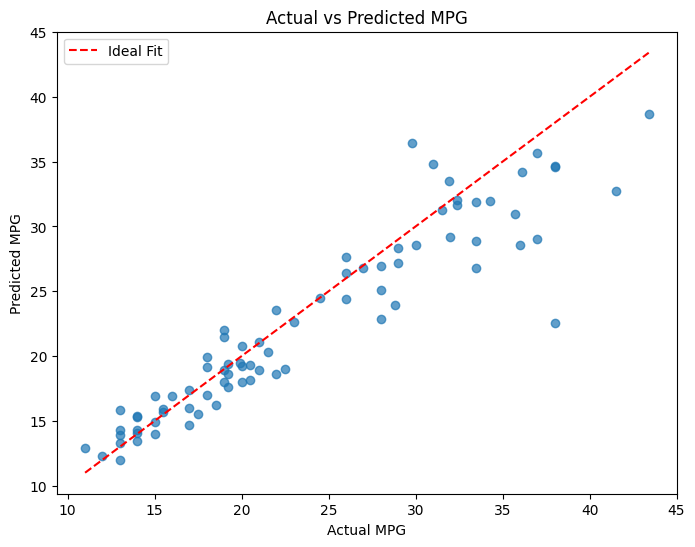

In [21]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test_rf, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', label="Ideal Fit")
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.title("Actual vs Predicted MPG")
plt.legend()
plt.show()
